## Software to plot comparisons between ray-tracing and various geolocation and refractive index determination techniques.

In [1]:
%pylab inline
import pandas as pd
import glob
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#fl = '/home/w2naf/Desktop/ray_data/bks_b3_f10_20120921_2-14.csv'
df = None
home_dir = os.getenv('HOME')
files = glob.glob(home_dir+'/Desktop/ray_data/*.csv')
for fl in files:
    print 'Loading file {fl}'.format(fl=fl)
    if df is None:
        df = pd.DataFrame.from_csv(fl)
    else:
        df_tmp = pd.DataFrame.from_csv(fl)
        df = df.append(df_tmp, ignore_index=True)

Loading file /home/davitpy/Desktop/ray_data/data.csv


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 24 columns):
beam           1078 non-null int64
elv_init       1078 non-null float64
gran           1078 non-null float64
h              1078 non-null float64
lat            1078 non-null float64
lon            1078 non-null float64
nr             1078 non-null float64
r              1078 non-null float64
radar          1078 non-null object
rel            1078 non-null float64
th             1078 non-null float64
time           1078 non-null object
Loc_time       1078 non-null float64
lgc_rt         1078 non-null float64
height         1078 non-null float64
h_2p           1078 non-null float64
th_2p          1078 non-null float64
lgc_2p         1078 non-null float64
nr_2p          1078 non-null float64
phase          1078 non-null int64
lat_2p         1078 non-null float64
lon_2p         1078 non-null float64
lgc_diff_2p    1078 non-null float64
nr_diff_2p     1078 non-null float64
dtypes: flo

In [5]:
df.tail(64)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p,lgc_diff_2p,nr_diff_2p
1014,3,8.7,505000,10000,38.777836,-83.074875,0.999336,6463641.5,bks,12.917627,0.075777,2012-09-20 04:00:00,21.461675,482.773474,92.6415,95.682729,0.077271,492.293026,0.997914,3,38.677027,-83.193000,-9.519552,0.001422
1015,3,8.7,515000,10000,38.810867,-83.176918,0.999254,6465741.5,bks,12.979358,0.077284,2012-09-20 04:00:00,21.454872,492.373379,94.7415,97.961212,0.078776,501.884233,0.997373,3,38.705402,-83.297360,-9.510855,0.001881
1016,3,8.7,1145000,10000,40.841419,-89.544373,0.963800,6623800.5,bks,9.471094,0.169920,2012-09-20 04:00:00,21.030375,1082.560304,252.8005,270.347706,0.171257,1091.078105,0.961751,3,40.264151,-89.861142,-8.517801,0.002049
1017,3,8.7,1155000,10000,40.872856,-89.644547,0.962069,6624184.5,bks,8.945795,0.171355,2012-09-20 04:00:00,21.023697,1091.703238,253.1845,273.529555,0.172684,1100.170303,0.961165,3,40.285263,-89.964681,-8.467065,0.000904
1018,3,8.7,1165000,10000,40.904278,-89.744713,0.960414,6624774.0,bks,8.409670,0.172789,2012-09-20 04:00:00,21.017019,1100.841424,253.7740,276.724923,0.174110,1109.253779,0.960578,3,40.306262,-90.068186,-8.412354,-0.000164
1019,3,8.7,1175000,10000,40.935673,-89.844879,0.958845,6625867.5,bks,7.871394,0.174223,2012-09-20 04:00:00,21.010341,1109.975150,254.8675,279.933792,0.175534,1118.328508,0.959991,3,40.327149,-90.171654,-8.353359,-0.001146
1020,3,8.6,485000,10000,38.712337,-82.872658,0.999752,6458752.0,bks,12.756023,0.072788,2012-09-20 04:00:00,21.475156,463.734959,87.7520,90.344673,0.074286,473.276832,0.999382,3,38.620495,-82.986336,-9.541872,0.000370
1021,3,8.6,495000,10000,38.745422,-82.974808,0.999532,6460881.5,bks,12.791274,0.074298,2012-09-20 04:00:00,21.468346,473.352902,89.8815,92.577088,0.075794,482.886510,0.998845,3,38.649108,-83.090731,-9.533608,0.000687
1022,3,8.6,505000,10000,38.778488,-83.076927,0.999380,6463003.0,bks,12.832406,0.075807,2012-09-20 04:00:00,21.461538,482.964721,92.0030,94.824199,0.077302,492.489530,0.998307,3,38.677609,-83.195138,-9.524809,0.001074
1023,3,8.6,515000,10000,38.811535,-83.179031,0.999280,6465098.0,bks,12.888237,0.077314,2012-09-20 04:00:00,21.454731,492.569705,94.0980,97.085989,0.078808,502.085856,0.997768,3,38.705997,-83.299554,-9.516151,0.001512


In [6]:
df['lgc_diff_2p'].describe()

count    1078.000000
mean       -7.061375
std         3.823738
min       -34.937246
25%        -8.312067
50%        -7.609164
75%        -5.522355
max         0.442182
Name: lgc_diff_2p, dtype: float64

In [7]:
df['nr_diff_2p'].describe()

count    1.078000e+03
mean     1.410951e-16
std      3.623570e-03
min     -9.350417e-03
25%     -1.804094e-03
50%      3.456995e-04
75%      2.272229e-03
max      1.165533e-02
Name: nr_diff_2p, dtype: float64

In [8]:
df['h_2p'].describe()

count    1078.000000
mean      353.248331
std        90.600890
min        88.935336
25%       292.570440
50%       338.820069
75%       427.126799
max       482.983159
Name: h_2p, dtype: float64

In [9]:
bins = np.arange(-205, 205,10)

In [10]:
bins

array([-205, -195, -185, -175, -165, -155, -145, -135, -125, -115, -105,
        -95,  -85,  -75,  -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,
         15,   25,   35,   45,   55,   65,   75,   85,   95,  105,  115,
        125,  135,  145,  155,  165,  175,  185,  195])

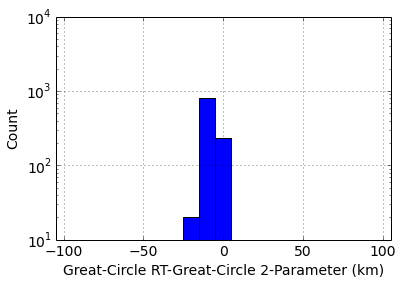

In [11]:
df['lgc_diff_2p'].hist(bins=bins, log=True)
rcParams.update({'font.size':14})
plt.xlim(-105, 105)
plt.ylim(10,10000)
plt.xlabel('Great-Circle RT-Great-Circle 2-Parameter (km)')
plt.ylabel('Count')

In [12]:
#df['lgc_diff_sm'].hist(bins=bins, log=True)
#plt.xlim(-205, 205)
#plt.xlabel('Great-Circle RT-Great-Circle SM (km)')
#plt.ylabel('Count')

In [13]:
#plt.xlim(-205, 205)
#plt.xlabel('Great-Circle RT-Great-Circle CM (km)')
#plt.ylabel('Count')

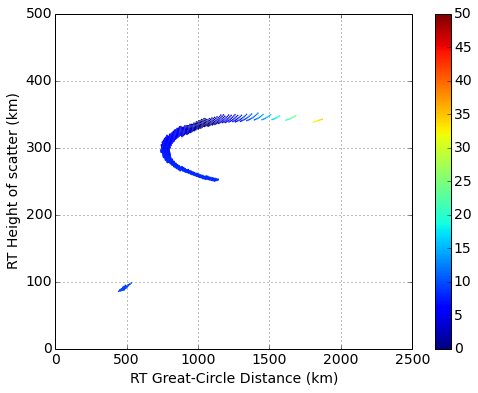

In [14]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=50) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

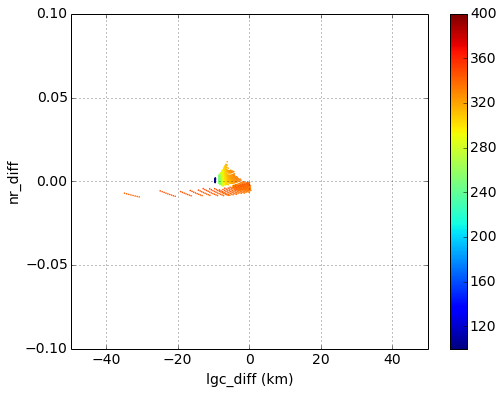

In [15]:
xvar = df['lgc_diff_2p']
yvar = df['nr_diff_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('lgc_diff (km)')
ax.set_xlim(-50, 50)
ax.set_ylim(-.10, .10)
ax.set_ylabel ('nr_diff')
ax.grid()

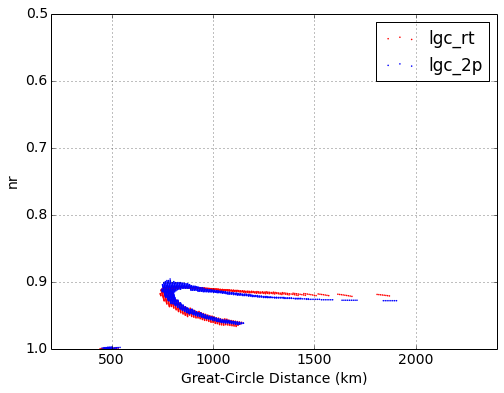

In [16]:
xvar = df['lgc_rt']
xvar1 = df['lgc_2p']
yvar = df['nr']
yvar1 = df['nr_2p']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c='red', s=10, marker='.', edgecolor='none', vmin=100, vmax=400,label='lgc_rt') 
scat = ax.scatter(xvar1, yvar1, c='blue', s=10, marker='.', edgecolor='none', vmin=100, vmax=400,label='lgc_2p') 
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(200, 2400)
ax.set_ylim(1.0, 0.5)
ax.set_ylabel ('nr')
ax.grid()
ax.legend(loc='upper right')

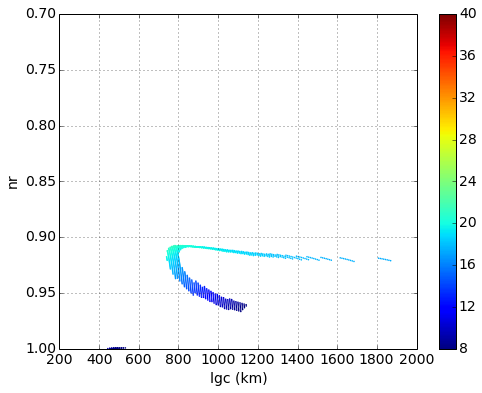

In [17]:
xvar = df['lgc_rt']
yvar = df['nr']
color = df['elv_init']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=8, vmax=40) 
plt.colorbar(scat)
ax.set_xlabel ('lgc (km)')
ax.set_xlim(200, 2000)
ax.set_ylim(1.0, 0.7)
ax.set_ylabel ('nr')
ax.grid()

In [18]:
df['lgc_diff_2p'].describe()

count    1078.000000
mean       -7.061375
std         3.823738
min       -34.937246
25%        -8.312067
50%        -7.609164
75%        -5.522355
max         0.442182
Name: lgc_diff_2p, dtype: float64

In [19]:
df['nr_diff_2p'].describe()

count    1.078000e+03
mean     1.410951e-16
std      3.623570e-03
min     -9.350417e-03
25%     -1.804094e-03
50%      3.456995e-04
75%      2.272229e-03
max      1.165533e-02
Name: nr_diff_2p, dtype: float64

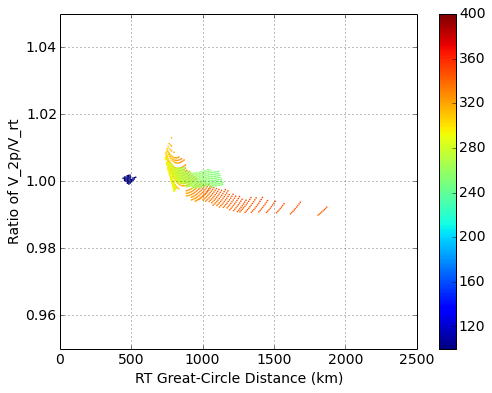

In [20]:
xvar = df['lgc_rt']
yvar = df['nr']/df['nr_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0.95, 1.05)
ax.set_ylabel('Ratio of V_2p/V_rt')
ax.grid()

In [21]:
#xvar = df['lgc_rt']
#yvar = df['height']
#color = np.abs(df['lgc_diff_sm'])
#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
#scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
#plt.colorbar(scat)
#ax.set_xlabel ('RT Great-Circle Distance (km)')
#ax.set_xlim(0, 2500)
#ax.set_ylim(0, 500)
#ax.set_ylabel ('RT Height of scatter (km)')
#ax.grid()

In [22]:
#xvar = df['lgc_rt']
#yvar = df['height']
#color = np.abs(df['lgc_diff_cm'])
#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
#scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
#plt.colorbar(scat)
#ax.set_xlabel ('RT Great-Circle Distance (km)')
#ax.set_xlim(0, 2500)
#ax.set_ylim(0, 500)
#ax.set_ylabel ('RT Height of scatter (km)')
#ax.grid()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 24 columns):
beam           1078 non-null int64
elv_init       1078 non-null float64
gran           1078 non-null float64
h              1078 non-null float64
lat            1078 non-null float64
lon            1078 non-null float64
nr             1078 non-null float64
r              1078 non-null float64
radar          1078 non-null object
rel            1078 non-null float64
th             1078 non-null float64
time           1078 non-null object
Loc_time       1078 non-null float64
lgc_rt         1078 non-null float64
height         1078 non-null float64
h_2p           1078 non-null float64
th_2p          1078 non-null float64
lgc_2p         1078 non-null float64
nr_2p          1078 non-null float64
phase          1078 non-null int64
lat_2p         1078 non-null float64
lon_2p         1078 non-null float64
lgc_diff_2p    1078 non-null float64
nr_diff_2p     1078 non-null float64
dtypes: flo

In [24]:
bins_nr = np.arange(-.055, .095, .01)

In [25]:
bins_nr

array([-0.055, -0.045, -0.035, -0.025, -0.015, -0.005,  0.005,  0.015,
        0.025,  0.035,  0.045,  0.055,  0.065,  0.075,  0.085])

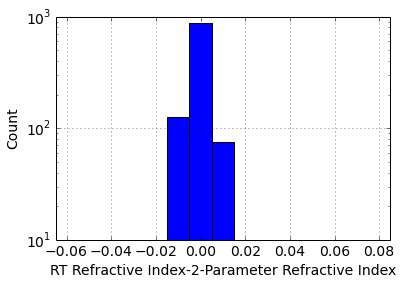

In [26]:
df['nr_diff_2p'].hist(bins=bins_nr, log=True)
plt.xlim(-.065, .085)
plt.xlabel('RT Refractive Index-2-Parameter Refractive Index')
plt.ylabel('Count')

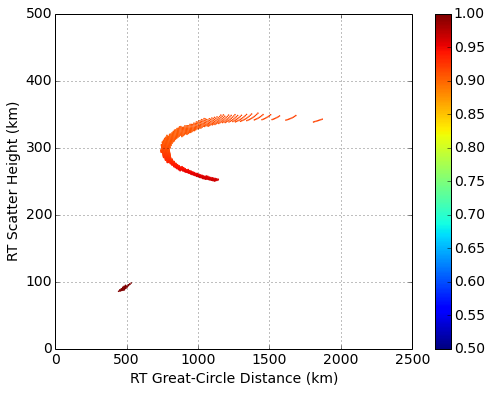

In [27]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.5, vmax=1.0)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()

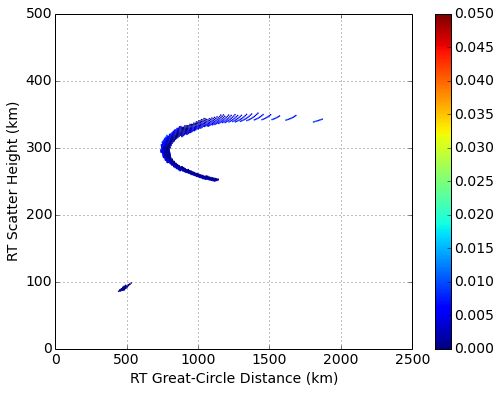

In [28]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr_diff_2p'])  #was 'nr'
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin= 0., vmax=0.05) #was 0.5,1.0
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()